In [1]:
from math import sqrt, pi
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

### Question 1(a)

This is simple unit conversion from atmospheres to pascals (Pa) and bar. 

In [2]:
# the pressure to be converting in atmospheres
p = 1. / 3. #atm
print('p = {} [atm]'.format(p))

p = 0.3333333333333333 [atm]


In [3]:
# the conversion factor from atmospheres to Pascals
Pa_per_atm = 101325. #Pa atm-1

# if we format out algebra correctly this can always be multiplicative
p_SI = p * Pa_per_atm #Pa
print('p = {} [atm] * {} [Pa/atm] = {} [Pa]'.format(p, Pa_per_atm, p_SI))

p = 0.3333333333333333 [atm] * 101325.0 [Pa/atm] = 33775.0 [Pa]


In [4]:
# the conversion factor from atmospheres to bar
bar_per_atm = 1.01325 #bar atm-1

# again it is a simple multiplication
p_bar = p * bar_per_atm
print('p = {} [atm] * {} [bar/atm] = {} [bar]'.format(p, bar_per_atm, p_bar))

p = 0.3333333333333333 [atm] * 1.01325 [bar/atm] = 0.33775 [bar]


### Question 1(b)

This is determining the number of moles followed by the ideal gas law

In [5]:
# First we need to convert from mg in to grams
m = 255 #mg
g_per_mg = 1E-3 #g mg-1
m_g = m * g_per_mg
print('m_g = {} [mg] * {} [mg/g] = {} g'.format(m, g_per_mg, m_g))

# the number of moles can then be found
Mw = 20.1797
n = m_g / Mw
print('n = {} [g] / {:.3f} [g/mol] = {:.3f} [mol]'.format(m_g, Mw, n))

m_g = 255 [mg] * 0.001 [mg/g] = 0.255 g
n = 0.255 [g] / 20.180 [g/mol] = 0.013 [mol]


In [6]:
# need to convert from litres to SI which is m3
V = 3. #L
m3_per_litre = 1e-3 #m3 L-1
V_m3 = V * m3_per_litre
print('V_m3 = {} [L] * {} [m3/L] = {} [m3]'.format(V, m3_per_litre, V_m3))

# the pressure is then found from the ideal gas law
R = 8.314 #J K-1 mol-1
T = 122 #K
p = (n * R * T) / V_m3
print('p = ({:.3f} [mol] * {} [J/Kmol] * {} [K]) / {} [m3]'.format(n, R, T, V_m3))
print('p = {:.3f} [Pa]'.format(p))

V_m3 = 3.0 [L] * 0.001 [m3/L] = 0.003 [m3]
p = (0.013 [mol] * 8.314 [J/Kmol] * 122 [K]) / 0.003 [m3]
p = 4272.421 [Pa]


### Question 1(c)

Another simple unit conversion, and then volume of a sphere

In [7]:
# the radius value and the two conversion factors
r = 140 #pm
angstrom_per_pm = 1e-2 #angstrom pm-1
m_per_pm = 1e-12 #m pm-1

# again the conversions are simple if we consider them multiplicatively 
r_angstrom = r * angstrom_per_pm
r_m = r * m_per_pm
print('r = {} [pm] * {} [angstrom/pm]= {:.3f} [angstrom]'
      .format(r, angstrom_per_pm, r_angstrom))
print('r = {} [pm] * {} [m/pm] = {:.11f} [m]'.format(r, m_per_pm, r_m))

r = 140 [pm] * 0.01 [angstrom/pm]= 1.400 [angstrom]
r = 140 [pm] * 1e-12 [m/pm] = 0.00000000014 [m]


In [8]:
# the equation for the volume of a sphere
V = 4. / 3. * pi * r_m ** 3
print('V = (4. / 3.) * {:.3f} * {} [m] ^ 3 = {:.3e} [m3]'.format(pi, r_m, V))
print('The volume of the helium atom is {:.3e} m3'. format(V))

V = (4. / 3.) * 3.142 * 1.4e-10 [m] ^ 3 = 1.149e-29 [m3]
The volume of the helium atom is 1.149e-29 m3


### Question 2

In this I have used functions for the average speed calculation and the conversion from m/s to mph. These are then called in a loop through the elements and the temperatures.

In [9]:
def averagespeed(T, m):
    # this is a function to calculate, and return the average speed.
    R = 8.314 #J K-1 mol-1
    c = sqrt((3 * R * T) / m)
    print('c = sqrt( (3 * {} [J/Kmol] * {} [K]) / {} [g/mol] )'.format(R, T, m))
    return c

def convert_to_mph(c):
    # this is a function to convert c to mph
    c_miles_per_second = c * 0.000621 # miles per second
    c_mph = c_miles_per_second * 60 * 60 # miles per hour
    print('c = {:.3f} m/s = {:.3e} miles/s = {:.3f} mph'
          .format(c, c_miles_per_second, c_mph))
    return c_mph
    
# the three elements we are studying and their masses
elements = ['neon', 'krypton', 'argon']
masses = [20.18, 83.8, 131.29]

# the two temperatures to be calculated
temperatures = [25, 250]

# this loops through the three different elements
for i in range(0, 3):
    # this loops through the two temperatures
    for j in range(0, 2):
        # converting the molecular masses from g mol-1 to kg mol-1
        mass_kg = masses[i] * 1e-3
        # converting the temperatures from degrees C into kelvin
        temp_K = temperatures[j] + 273.15 #K
        # calling the function defined above
        c = averagespeed(temp_K, masses[i])
        print('{} - average speed @ {} C = {:.2f} m/s'
              .format(elements[i], temperatures[j], c))
        # calling the other function defined above
        c_mph = convert_to_mph(c)
        print('{} - average speed @ {} C = {:.2f} mph \n'
              .format(elements[i], temperatures[j], c_mph))

c = sqrt( (3 * 8.314 [J/Kmol] * 298.15 [K]) / 20.18 [g/mol] )
neon - average speed @ 25 C = 19.20 m/s
c = 19.197 m/s = 1.192e-02 miles/s = 42.916 mph
neon - average speed @ 25 C = 42.92 mph 

c = sqrt( (3 * 8.314 [J/Kmol] * 523.15 [K]) / 20.18 [g/mol] )
neon - average speed @ 250 C = 25.43 m/s
c = 25.428 m/s = 1.579e-02 miles/s = 56.848 mph
neon - average speed @ 250 C = 56.85 mph 

c = sqrt( (3 * 8.314 [J/Kmol] * 298.15 [K]) / 83.8 [g/mol] )
krypton - average speed @ 25 C = 9.42 m/s
c = 9.420 m/s = 5.850e-03 miles/s = 21.060 mph
krypton - average speed @ 25 C = 21.06 mph 

c = sqrt( (3 * 8.314 [J/Kmol] * 523.15 [K]) / 83.8 [g/mol] )
krypton - average speed @ 250 C = 12.48 m/s
c = 12.478 m/s = 7.749e-03 miles/s = 27.897 mph
krypton - average speed @ 250 C = 27.90 mph 

c = sqrt( (3 * 8.314 [J/Kmol] * 298.15 [K]) / 131.29 [g/mol] )
argon - average speed @ 25 C = 7.53 m/s
c = 7.526 m/s = 4.674e-03 miles/s = 16.825 mph
argon - average speed @ 25 C = 16.83 mph 

c = sqrt( (3 * 8.314 [J/Kmo

### Question 3(b)

Just more unit conversions and the ideal gas law

In [10]:
# defining the variables 
p = 1 #atm
V = 60 #dm3
R = 8.314 #J K-1 mol-1
T = 298 #K

# converting atmospheres to pascals and dm3 to m3
p_SI = p * Pa_per_atm #Pa atm-1
print('p = {} [atm] * {} [Pa/atm] = {} [Pa]'.format(p, Pa_per_atm, p_SI))
m3_per_dm3 = 0.001 #m3 dm-3
V_m3 = V * m3_per_dm3
print('V_m3 = {} [dm3] * {} [m3/dm3] = {} [m3]'.format(V, m3_per_dm3, V_m3))

# calculation of the number of moles from the ideal gas law
n = (p_SI * V_m3) / (R * T)
print('n = {:.3f} moles'.format(n))

p = 1 [atm] * 101325.0 [Pa/atm] = 101325.0 [Pa]
V_m3 = 60 [dm3] * 0.001 [m3/dm3] = 0.06 [m3]
n = 2.454 moles


### Question 3(c)

This is firstly calculating the number of moles from the reaction equation and then a mass/molecular weight calculation

In [11]:
# the ratio of NaN3 to N2 from the reaction equation
nan3_per_n2 = 2. / 3.

# This ratio is then applied to the number of moles calculated above
n_nan3 = nan3_per_n2 * n

print('moles of NaN3 = {:.3f} [mol] * {:.3f} = {:.3f} [mol]'
      .format(nan3_per_n2, n, n_nan3))
print('amount of NaN3 produced = {:.3f} mol'.format(n_nan3))

moles of NaN3 = 0.667 [mol] * 2.454 = 1.636 [mol]
amount of NaN3 produced = 1.636 mol


In [12]:
# simple molecular weight calculation
Mw = 65 #g mol-1
m = Mw * n_nan3
print('m = {} [g/mol] * {:.3f} [mol] = {:.3f} [g]'.format(Mw, n_nan3, m))
print('Mass of NaN3 = {:.3f} g'.format(m))

m = 65 [g/mol] * 1.636 [mol] = 106.332 [g]
Mass of NaN3 = 106.332 g


### Question 3(d)

Putting the number calculated previously back into the ideal gas law with a different temperature defined

In [13]:
# need to convert the temperature to kelvin 
T = 5 #degC

T_K = 5 + 273.15
print('{} degrees C = {} K'.format(T, T_K))

# then get the new volume with everything else the same
V = (n * R * T_K) / p

print('V = ({:.3f} [mol] * {} [J/Kmol] * {} [K]) / {} [Pa] = {:.3f} [m3]'
      .format(n, R, T_K, p, V))
print('The volume at the lower temperature would be {:.3f} m3'.format(V))

5 degrees C = 278.15 K
V = (2.454 [mol] * 8.314 [J/Kmol] * 278.15 [K]) / 1 [Pa] = 5674.540 [m3]
The volume at the lower temperature would be 5674.540 m3


### Question 7

This involves plotting the given data, and drawing an appropriate straight line

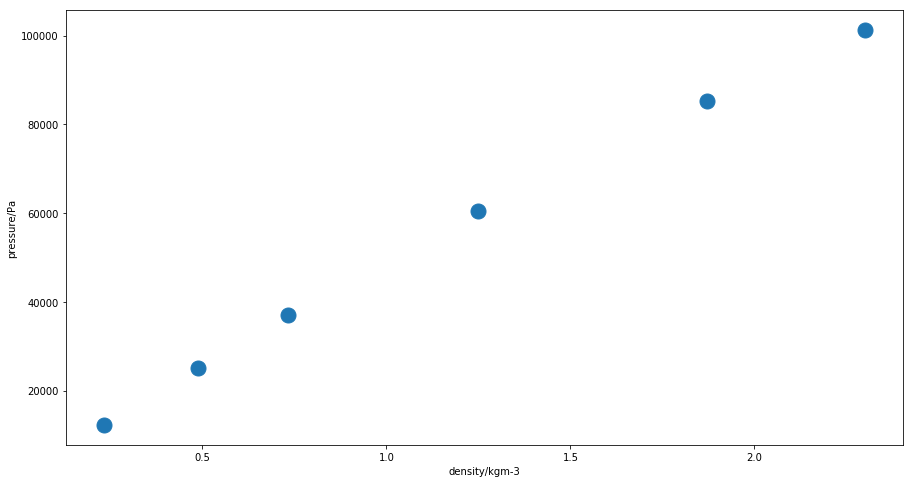

In [14]:
# these are the datasets given in the tutorial
p = [0, 12231, 25195, 36970, 60367, 85231, 101325] #Pa
rho = [0, 0.232, 0.489, 0.733, 1.25, 1.87, 2.3] #kg m-3

# this draws the plot
plt.figure(figsize=(15, 8))
plt.plot(rho[1:], p[1:], 'o', markersize=15)
plt.xlabel('density/kgm-3')
plt.ylabel('pressure/Pa')
plt.show()

The line doesn't look super straight but let us draw a line of best fit anyway.

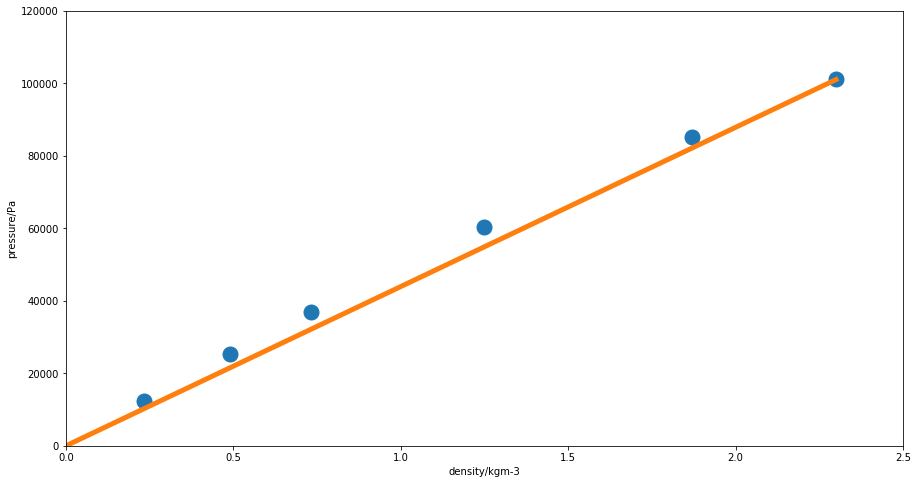

The slope of the line of best fit is 43936.292 Pa kg-1 m3.



In [15]:
# this determines the line of best fit with the intercept held at zero
slope, intercept, rvalue, pvalue, stderr = linregress(rho, p)

# then draw a line of best fit over the data
y = slope * np.asarray(rho)

# this allows both the data and the line of best fit to be plotted
plt.figure(figsize=(15, 8))
plt.plot(rho[1:], p[1:], 'o', markersize=15)
plt.plot(rho, y, '-', linewidth=5)
plt.xlabel('density/kgm-3')
plt.ylabel('pressure/Pa')
plt.xlim([0, 2.5])
plt.ylim([0, 120000])
plt.show()

print('The slope of the line of best fit is {:.3f} Pa kg-1 m3.\n'
      .format(slope))

Try and calculate the molar mass to see if it matches

In [16]:
R = 8.314 #J K-1 mol-1
T = 298.15 #T

Mw_kg = (R * T) / slope #kg mol-1
print('Mw = ({} [J/Kmol] * {} [K]) / {:.3f} [Pam3/kg] = {:.3f} [kg/mol]'
      .format(R, T, slope, Mw_kg))

g_per_kg = 1000 #g kg-1
Mw = Mw_kg * g_per_kg

print('Mw = {:.3f} [kg/mol] = {:.3f} [g/mol]'.format(Mw_kg, Mw))
print('The molecular weight is {:.3f} g mol-1 it should be 47.74 g mol-1'
      .format(Mw))

Mw = (8.314 [J/Kmol] * 298.15 [K]) / 43936.292 [Pam3/kg] = 0.056 [kg/mol]
Mw = 0.056 [kg/mol] = 56.418 [g/mol]
The molecular weight is 56.418 g mol-1 it should be 47.74 g mol-1


It doesn't match! As mentioned above this straight line is not suitable (as the data points used aren't straight). This is because at highest pressure and density the ideal gas law no longer applies. Instead only the first data point and the assumption that the line passes through the intercept are used. 

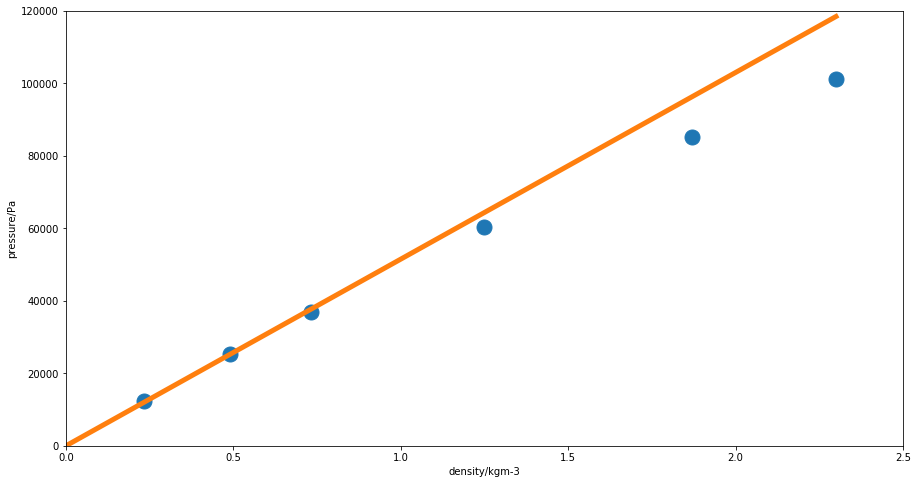

This gives a different slope of 51504.189 Pa kg-1 m3


In [17]:
# this determines the line of best fit for the first and intercept points
slope, intercept, rvalue, pvalue, stderr = linregress(rho[:3], p[:3])

# the line of best fit is found
y = slope * np.asarray(rho)

# this allows both the data and the new line of best fit to be plotted
plt.figure(figsize=(15, 8))
plt.plot(rho[1:], p[1:], 'o', markersize=15)
plt.plot(rho, y, '-', linewidth=5)
plt.xlabel('density/kgm-3')
plt.ylabel('pressure/Pa')
plt.xlim([0, 2.5])
plt.ylim([0, 120000])
plt.show()

print('This gives a different slope of {:.3f} Pa kg-1 m3'.format(slope))

We can see if this slope gives a better molecular weight

In [18]:
R = 8.314 #J K-1 mol-1
T = 298.15 #T

Mw_kg = (R * T) / slope #kg mol-1
print('Mw = ({} [J/Kmol] * {} [K]) / {:.3f} [Pam3/kg] = {:.3f} [kg/mol]'
      .format(R, T, slope, Mw_kg))

g_per_kg = 1000 #g kg-1
Mw = Mw_kg * g_per_kg

print('Mw = {:.3f} [kg/mol] = {:.3f} [g/mol]'.format(Mw_kg, Mw))
print('The molecular weight is {:.3f} g mol-1 is should be 47.74 g mol-1.'
      .format(Mw))

Mw = (8.314 [J/Kmol] * 298.15 [K]) / 51504.189 [Pam3/kg] = 0.048 [kg/mol]
Mw = 0.048 [kg/mol] = 48.128 [g/mol]
The molecular weight is 48.128 g mol-1 is should be 47.74 g mol-1.
